# Imports

In [1]:
import logging
import os
from pathlib import Path
import geopandas as gpd
import numpy as np
import sys

from multiview_mapping_toolkit.segmentation import (
    write_chips,
)
from multiview_mapping_toolkit.utils.visualization import show_segmentation_labels

sys.path.append("../..")
from constants import (
    LABELS_COLUMN,
    LABELS_FILENAME,
    get_IDs_to_labels,
    get_training_raster_filename,
    get_training_chips_folder,
)

/ofo-share/repos-david/conda/envs/MVMT-stable/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define constants 

In [2]:
TRAINING_SITE = "delta"

In [3]:
CHIP_SIZE = 3648
TRAINING_STRIDE = int(CHIP_SIZE / 2)
INFERENCE_STRIDE = int(CHIP_SIZE / 2)
TRAINING_IMGS_EXT = ".png"
TEST_IMGS_EXT = TRAINING_IMGS_EXT

In [4]:
logging.basicConfig(level="INFO")

['ABCO', 'CADE', 'PILA', 'PIPJ', 'PSME']

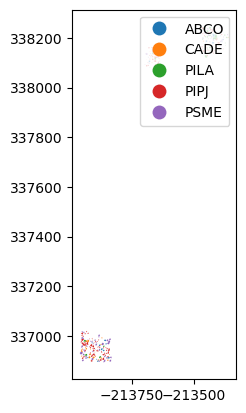

In [5]:
# Load the data
gdf = gpd.read_file(LABELS_FILENAME)

gdf.query(f"fire=='{TRAINING_SITE}'").plot(LABELS_COLUMN, legend=True, vmin=0, vmax=9)
class_names = np.unique(gpd.read_file(LABELS_FILENAME)[LABELS_COLUMN]).tolist()
class_names

# Create training chips

In [6]:
IDS_TO_LABELS = get_IDs_to_labels()
TRAINING_RASTER_FILENAME = get_training_raster_filename(training_site=TRAINING_SITE)
TRAINING_CHIPS_FOLDER = get_training_chips_folder(training_site=TRAINING_SITE)

# Interchange the keys and values
label_remap = {v: k for k, v in IDS_TO_LABELS.items()}

write_chips(
    raster_file=TRAINING_RASTER_FILENAME,
    output_folder=TRAINING_CHIPS_FOLDER,
    chip_size=CHIP_SIZE,
    chip_stride=TRAINING_STRIDE,
    label_vector_file=LABELS_FILENAME,
    label_column=LABELS_COLUMN,
    label_remap=label_remap,
    output_suffix=TRAINING_IMGS_EXT,
    ROI_file=LABELS_FILENAME,
)

Writing image chips and labels to /ofo-share/scratch-david/organized-str-disp-MVMT-experiments/per_site_processing/delta/03_training_data/ortho_chipped_images_delta: 100%|██████████| 1426/1426 [02:41<00:00,  8.84it/s]


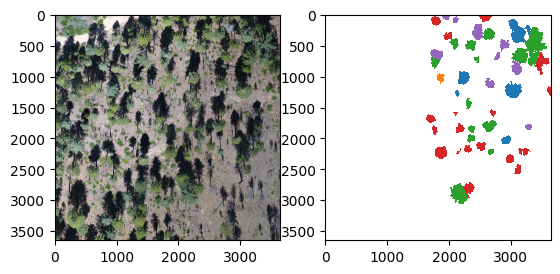

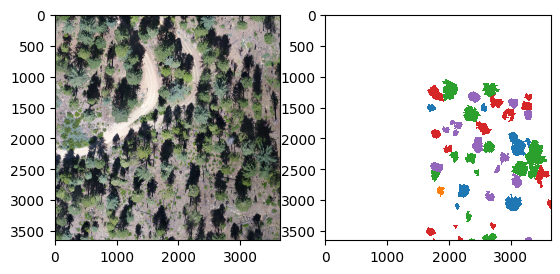

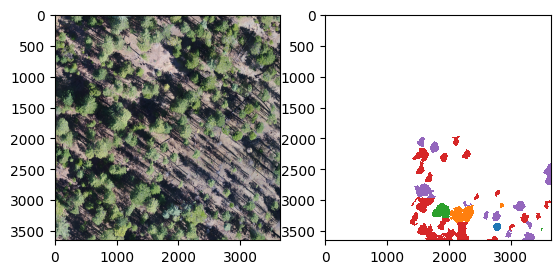

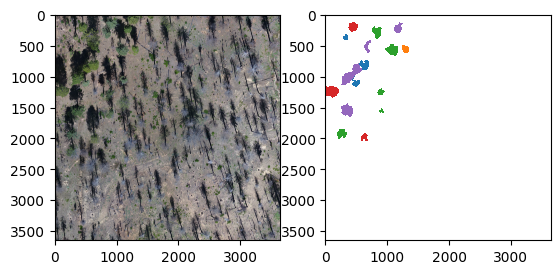

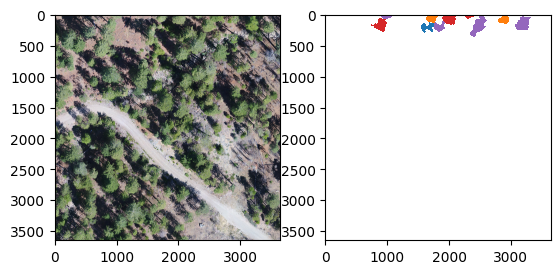

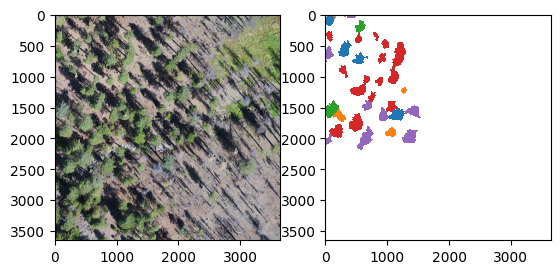

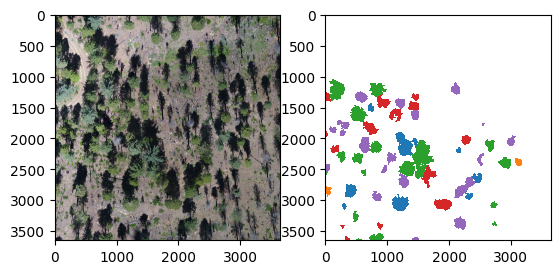

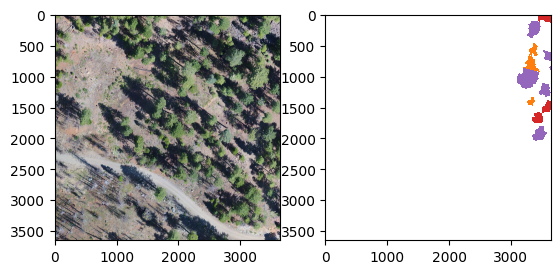

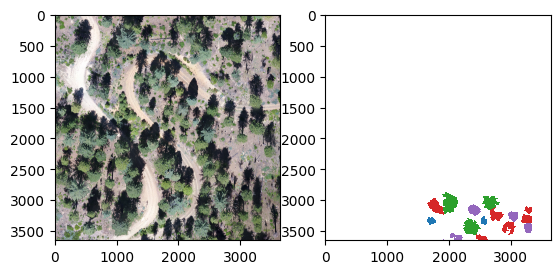

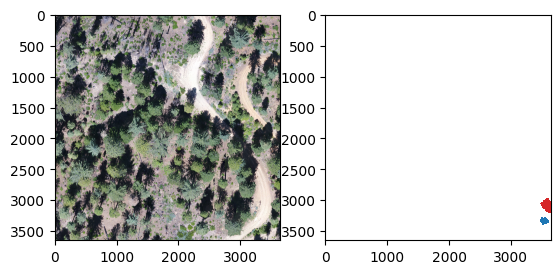

In [7]:
show_segmentation_labels(
    label_folder=Path(TRAINING_CHIPS_FOLDER, "anns"),
    image_folder=Path(TRAINING_CHIPS_FOLDER, "imgs"),
    image_suffix=TRAINING_IMGS_EXT,
)